In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [10]:
# Get all the columns of Measurement
from sqlalchemy import inspect
inspector=inspect(engine)
column1=inspector.get_columns("Measurement")
column1

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [11]:
# Get all the columns of Station
columns2=inspector.get_columns("Station")
columns2

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [12]:
# Get the last date
last_date=session.query(func.max(Measurement.date)).all()
last_date

[('2017-08-23')]

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
prec_data=session.query(Measurement.date,Measurement.prcp).\
                filter(Measurement.date>='2016-08-23').\
                filter(Measurement.date<='2017-08-23').all()
prec_data[0:10]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df=pd.DataFrame(prec_data,columns=["date","precipitation"])
prec_df.set_index("date",inplace=True)
prec_df.head(10)

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [15]:
# Sort the dataframe by date
prec_df=prec_df.sort_values(by="date")
prec_df.head(10)

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


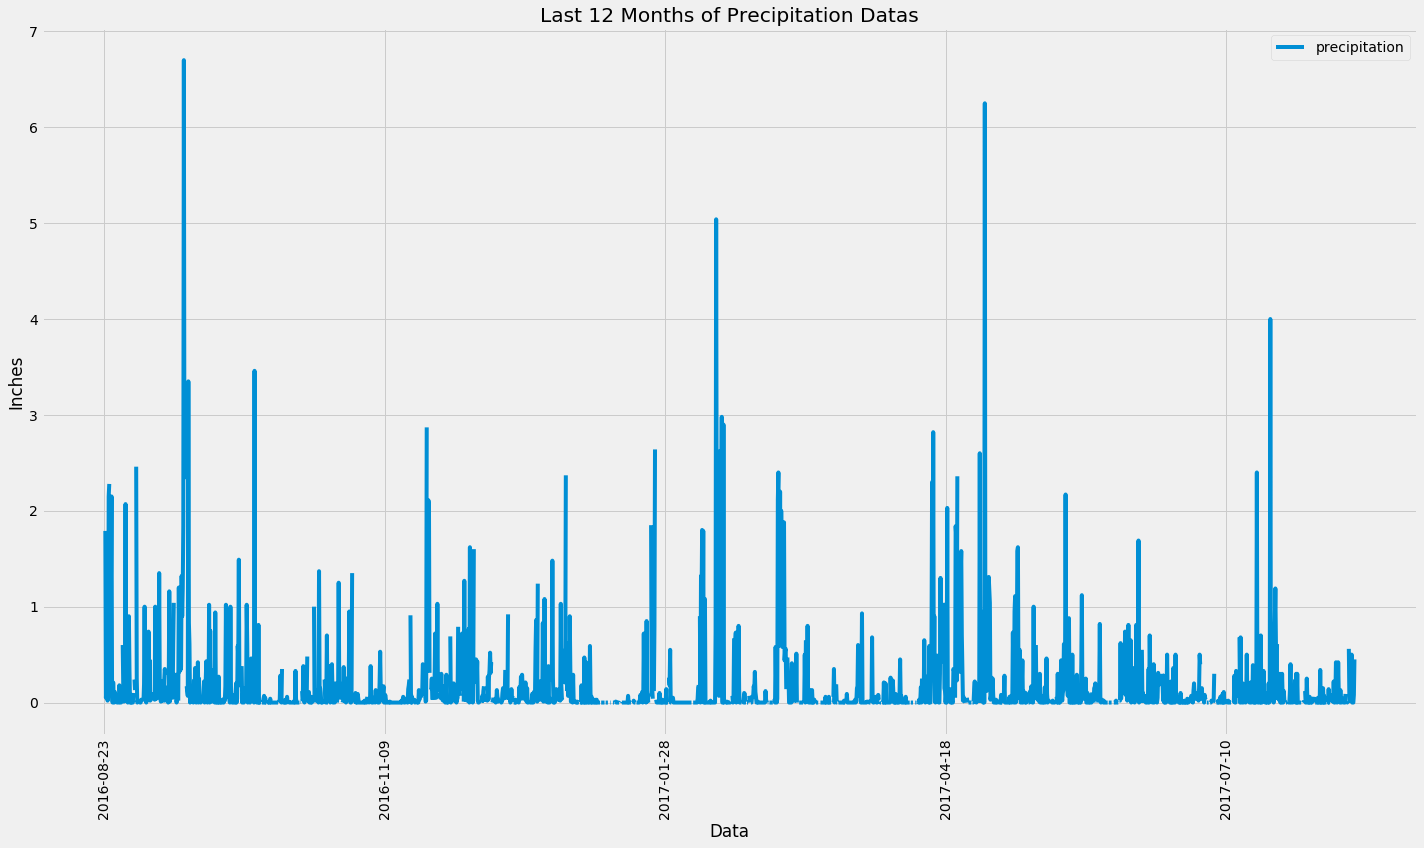

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
fig1,ax1=plt.subplots(figsize=(20,12))
prec_df.plot(ax=ax1,grid=True,rot=90)
plt.xlabel("Data")
plt.ylabel("Inches")
plt.title("Last 12 Months of Precipitation Datas")
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df["precipitation"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

In [20]:
# Design a query to show how many stations are available in this dataset?
from sqlalchemy import distinct
stations=session.query(distinct(Station.id)).count()
stations

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_rows=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### USC00519281 has the highest number of rows.

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
min_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station=="USC00519281").first()
max_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station=="USC00519281").first()
avg_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").first()
print(f"The lowest temperature of station USC00519281 is {min_temp[0]}.")
print(f"The highest temperature of station USC00519281 is {max_temp[0]}.")
print(f"The average temperature of station USC00519281 is {avg_temp[0]}.")

The lowest temperature of station USC00519281 is 54.0.
The highest temperature of station USC00519281 is 85.0.
The average temperature of station USC00519281 is 71.66378066378067.


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp=session.query(Measurement.date,Measurement.tobs).\
                filter(Measurement.station=="USC00519281").\
                filter(Measurement.date>='2016-08-23').\
                filter(Measurement.date<='2017-08-23').all()
tobs_df=pd.DataFrame(temp,columns=["date","temperatures"])
tobs_df.head()

,date,temperatures
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


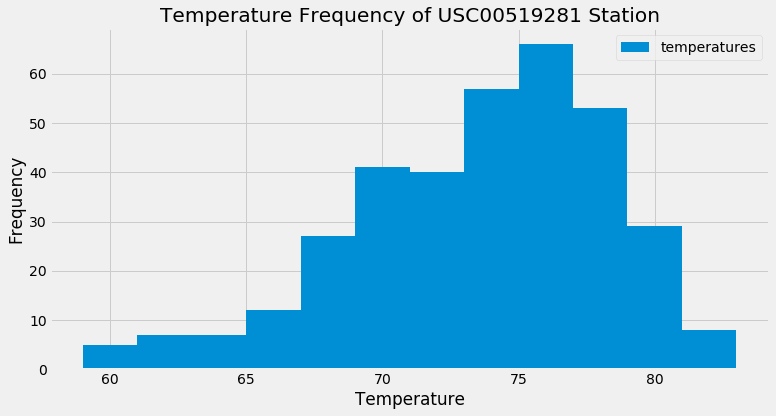

In [25]:
fig2,ax2=plt.subplots(figsize=(11,6))
tobs_df.plot.hist(ax=ax2,bins=12,grid=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Frequency of USC00519281 Station")
plt.tight_layout()
plt.show()